<a href="https://colab.research.google.com/github/ramana16/EVA4/blob/master/EVA4S15DenseDepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
%reload_ext autoreload
%autoreload 2

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import zipfile

path_to_zip_file = "/content/gdrive/My Drive/Colab Notebooks/EVA4/S15A/fg_bg.zip"
directory_to_extract_to = '/content/'
print("Extracting zip file: %s" % path_to_zip_file)
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  for f in zip_ref.namelist():
    if f.startswith('fg_bg/'):
      zip_ref.extract(f, directory_to_extract_to)
print("Extracted at: %s" % directory_to_extract_to)

Extracting zip file: /content/gdrive/My Drive/Colab Notebooks/EVA4/S15A/fg_bg.zip
Extracted at: /content/


In [3]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ba778943-5ed5-9f06-3e13-445a34263dab)


In [4]:
!git clone -b cars_fg https://github.com/ramana16/DenseDepth.git

Cloning into 'DenseDepth'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 254 (delta 5), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (254/254), 11.80 MiB | 2.82 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [5]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./DenseDepth/nyu.h5

--2020-07-25 01:59:57--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.60.115
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.60.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./DenseDepth/nyu.h5’

./DenseDepth/nyu.h5 100%[===================>] 164.89M  61.5MB/s    in 2.7s    

2020-07-25 02:00:00 (61.5 MB/s) - ‘./DenseDepth/nyu.h5’ saved [172897376/172897376]



In [6]:
import os
os.chdir("/content/DenseDepth")

from mtest import get_model, infer

Using TensorFlow backend.


In [7]:
model = get_model()

Loading model...

Model loaded (nyu.h5).


In [9]:
from zipfile import ZipFile, ZIP_STORED
import os
import datetime

bg_start = 75
bg_end = 100
zip_file_name = f"fg_bg_depth_s{bg_start:02d}_e{bg_end:02d}.zip"

for bg_id in range(bg_start, bg_end):
  st = datetime.datetime.now()
  zipf = ZipFile(zip_file_name, mode='a', compression=ZIP_STORED)
  infer(model, bg_id, zipf=zipf, show_viz=(bg_id==(bg_end-1)),
        batch_size=512, scale=2, base_path="/content/fg_bg")
  zipf.close()
  et = datetime.datetime.now()
  delta = et-st
  print(f"BG[{bg_id:02d}] processing time: {delta}")


Loading images from /content/fg_bg/bg_75/*.jpg
Batch[1]: Loaded (512) images of size (448, 448, 3).
Batch[2]: Loaded (512) images of size (448, 448, 3).
Batch[3]: Loaded (512) images of size (448, 448, 3).
Batch[4]: Loaded (464) images of size (448, 448, 3).
BG[75] processing time: 0:04:09.112539

Loading images from /content/fg_bg/bg_76/*.jpg
Batch[1]: Loaded (512) images of size (448, 448, 3).
Batch[2]: Loaded (512) images of size (448, 448, 3).
Batch[3]: Loaded (512) images of size (448, 448, 3).
Batch[4]: Loaded (464) images of size (448, 448, 3).
BG[76] processing time: 0:03:53.773616

Loading images from /content/fg_bg/bg_77/*.jpg
Batch[1]: Loaded (512) images of size (448, 448, 3).
Batch[2]: Loaded (512) images of size (448, 448, 3).
Batch[3]: Loaded (512) images of size (448, 448, 3).
Batch[4]: Loaded (464) images of size (448, 448, 3).
BG[77] processing time: 0:03:50.617852

Loading images from /content/fg_bg/bg_78/*.jpg
Batch[1]: Loaded (512) images of size (448, 448, 3).
Ba

In [10]:
os.system(f'cp "{zip_file_name}" "/content/gdrive/My Drive/Colab Notebooks/EVA4/S15A/"')

0

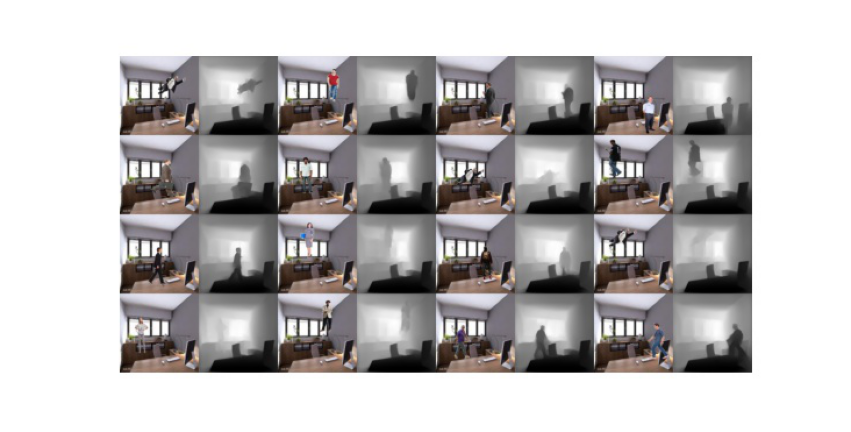

In [11]:
from matplotlib import pyplot as plt
from skimage import io

plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow( io.imread('/content/DenseDepth/visualise_depth_maps.jpg') )